## Candlestick Plot

In this lecture, we'll be using another case study to learn about visualizing time-series data. We'll be particularly focusing on candlestick plot, which is a special bar chart commonly used in trading platform, foreign exchange, and weather forecasts. 

Candlestick charts originated in Japan during the 1700s when Japanese traders Homma analyzed the price of trade pattern of rice contracts for huge profits. His research on so called price pattern recognition was widely credited and gave rise to the global trading in Japan.

![](Candlestick_Intro.png)

Candlestick plot delivers important information for traders given a time period. It shows the opening price, closing price, highest trading price and lowest trading price of a particular commodity over a time period. The rectangular portion of the candle is called the **Body**. The lines above and below the Body are called Upper and Lower Shadow respectively. The Highest Trading Price is marked by the top of the Upper Shadow and the Lowest trading Price is marked by the bottom of the Lower Shadow. 

Candlesticks can display various trading patterns like **bullish**, **bearish** and many more. In particular, the green candle represents the bullish pattern in which the trading price increased over a certain time period. The bottom of the candle body shows the opening price and the top of the candle body shows the closing price.

Conversely, the red candle shows the bearish pattern in which the price dropped over a period of time. In this case the top of the candle body shows the opening price and the bottom of the candle body shows the closing price.

In case you're curious, there is a great investopedia website which shows you a variery of trading patterns related to the candlestick plots.
* https://www.investopedia.com/trading/candlestick-charting-what-is-it/

There are many possible ways in Python to make candlestick plots, mpl_finance, plotly, finplot are among some of the most common libraries. We'll focus on using the mpl_finance option.

In [14]:
# Let's bring in pandas as pd as usual
import pandas as pd
# To get the Python to manipulate how datetime is formatted in the dataset, 
# we need to import the native datetime package
import datetime
# We also import matplotlib.pyplot as plt for making plots
import matplotlib.pyplot as plt
# and import date functionalities mdates
# https://matplotlib.org/3.3.2/api/dates_api.html
import matplotlib.dates as mdates

# Let's import the stock data stock pd.read_csv
# and let's parse the date column into datetime type and put it into index
stock_data = pd.read_csv('assets/stocks.csv', parse_dates = ['Date'], index_col = 1)
# and let's check it out.
stock_data.head()

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,AAPL,10.678572,10.321428,10.340000,10.678572,201808600.0,9.319328
2006-01-04,AAPL,10.854285,10.642858,10.732857,10.710000,154900900.0,9.346760
2006-01-05,AAPL,10.700000,10.535714,10.690000,10.625714,112355600.0,9.273201
2006-01-06,AAPL,10.957143,10.650000,10.750000,10.900000,176114400.0,9.512576
2006-01-09,AAPL,11.028571,10.820000,10.961429,10.864285,168760200.0,9.481407


In [15]:
# Now there are a few companies included in the stock data, so it's a good practice to 
# keep a list of the company names to make candlestick plot for each company
company_list = stock_data['Ticker'].unique().tolist()

# We can run a for loop to look at the stock data more closely
# So for each company in company_list
for company in company_list:
    # we print out the stock data associated with each company
    print(stock_data.groupby('Ticker').get_group(company))

# So you'll see there are 2517 opening trading day from 2006 to 2015. For each trading day, 
# the stock price of AAPL, MSFT, IBM, GOOG and an index fund called GSPC are shown in 4 values, 
# namely High, Low, Open and Close. 
# This is really a cool data!


           Ticker        High         Low        Open       Close  \
Date                                                                
2006-01-03   AAPL   10.678572   10.321428   10.340000   10.678572   
2006-01-04   AAPL   10.854285   10.642858   10.732857   10.710000   
2006-01-05   AAPL   10.700000   10.535714   10.690000   10.625714   
2006-01-06   AAPL   10.957143   10.650000   10.750000   10.900000   
2006-01-09   AAPL   11.028571   10.820000   10.961429   10.864285   
...           ...         ...         ...         ...         ...   
2015-12-24   AAPL  109.000000  107.949997  109.000000  108.029999   
2015-12-28   AAPL  107.690002  106.180000  107.589996  106.820000   
2015-12-29   AAPL  109.430000  106.860001  106.959999  108.739998   
2015-12-30   AAPL  108.699997  107.180000  108.580002  107.320000   
2015-12-31   AAPL  107.029999  104.820000  107.010002  105.260002   

                 Volume   Adj Close  
Date                                 
2006-01-03  201808600.0   

In [16]:
# Let's suppose we are interested in understanding how did the stock price of Apple, 
# Microsoft, IBM, Google and GSPC fluctuate over the great recession during 2008 and 2010.
# Let's pause the video and think of how do we visualize the bullish and bearish trend for each of the 5 stocks? 

# So here's my solution. We could first subset the time period to between 
# 2008 and 2010 and overwrite the old data
stock_data = stock_data['2008':'2010']
# and then reset the index
stock_data.reset_index(inplace = True)
# We can pass through a mapper in the date column
# to convert date to a unique numeric identifier of datetime
stock_data['Date'] = stock_data['Date'].map(mdates.date2num)

In [17]:
# Cool! Next, let's import lines
# which is an artistic library of legend handles supported by matplotlib,
import matplotlib.lines as mlines
# and we are specifically using mpl_finance candlestick_ohlc function to make candlestick plots
from mpl_finance import candlestick_ohlc

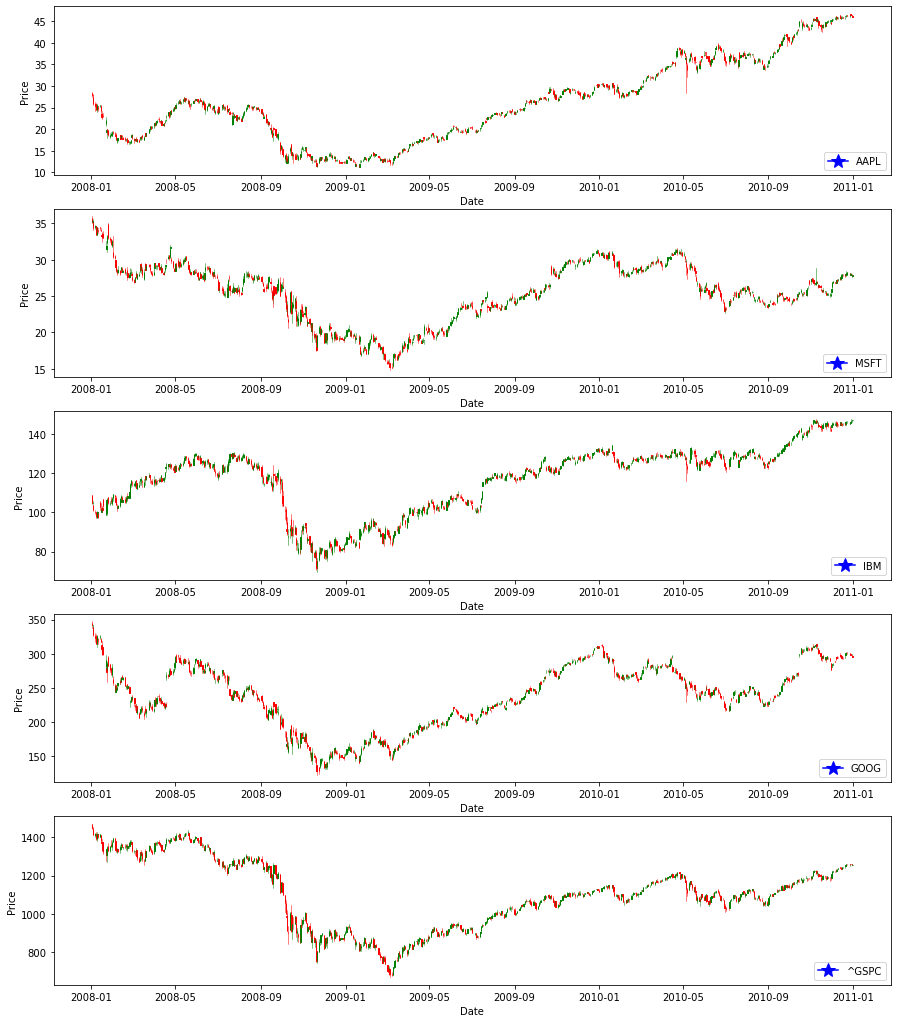

In [59]:
# Let's set up the visualization by creating our fig objects using matplotlib's 
# plt.gcf() (get current figure) function as usual, 

fig = plt.gcf()
# and I'm gotta set the size of it in inches to 15 by 18
fig.set_size_inches(15, 18)

#Now let's iterate over the list of companies and create a side-by-side figure for each of the 5 companies. 
for i in range(len(company_list)):
    # So stock_group will save a copy of the stock data splitted by company
    stock_group = stock_data.groupby('Ticker').get_group(company_list[i])
    # and we'll make a new subplot for each company
    ax = fig.add_subplot(5, 1, i+1)
    
    # We should be noted that candlestick plot expects the date as index, company names as labels, 
    # and the ohlc data as values. To recap, ohlc is just the short hand of open, high, 
    # low and close, values that best represent time-series trends.
    # Let's pull out a list of the columns to be used. 
    columns = ['Date', 'Open', 'High', 'Low', 'Close']
    
    # Cool! Now we'll use the candlestick_ohlc function (which is under the mpl_finance package)
    # and we pass through the ax object, and provide the plot with the date, and ohlc trade prices values
    # It's great to adjust the width of the "candles" so I use width equals 0.5 and set the color
    # for bullish (colorup) to be green
    candlestick_ohlc(ax,
                      stock_group[columns].values,
                      width = 0.5,
                      colorup = 'g')
    ax.xaxis_date()
    # Let's create a legend for each plot using a blue star as a logo for each company
    blue_star = mlines.Line2D([], [], color = 'blue', marker = '*',
                               markersize = 15, label = company_list[i])
    # and make the blue star as handles and set the legend at the lower right corner
    plt.legend(handles = [blue_star], loc='lower right')
    
    # and x y axis labels be Date and price respectively
    plt.xlabel("Date")
    plt.ylabel("Price")
    #plt.savefig('my_figure.png')
    # and show the graph
plt.show()

Cool! You can see the direction the stock price moved during the 3-year time frame of the candle by the color and positioning of the candlestick. When the candlestick is green, the price moves upward; when the candlestick is red, the price moves downward.

You can clearly see a majority of the candles are red during the year 2008. This reflects the overall pattern that the stock prices for all of the 5 tech companies plummetted from the beginning of 2008 to the end of the first quarter of 2009 by seeing many red candles. Apple Inc. and IBM recovered the loss in stock prices by the end of the 2010, while the rest of the three companies still traded lower than the beginning of 2008 at the end of the 2010. The size of the candles is also important. So I will invite you to make your own interpretations.

* https://pypi.org/project/mplfinance/
* https://matplotlib.org/tutorials/intermediate/legend_guide.html
* https://plotly.com/python/candlestick-charts/

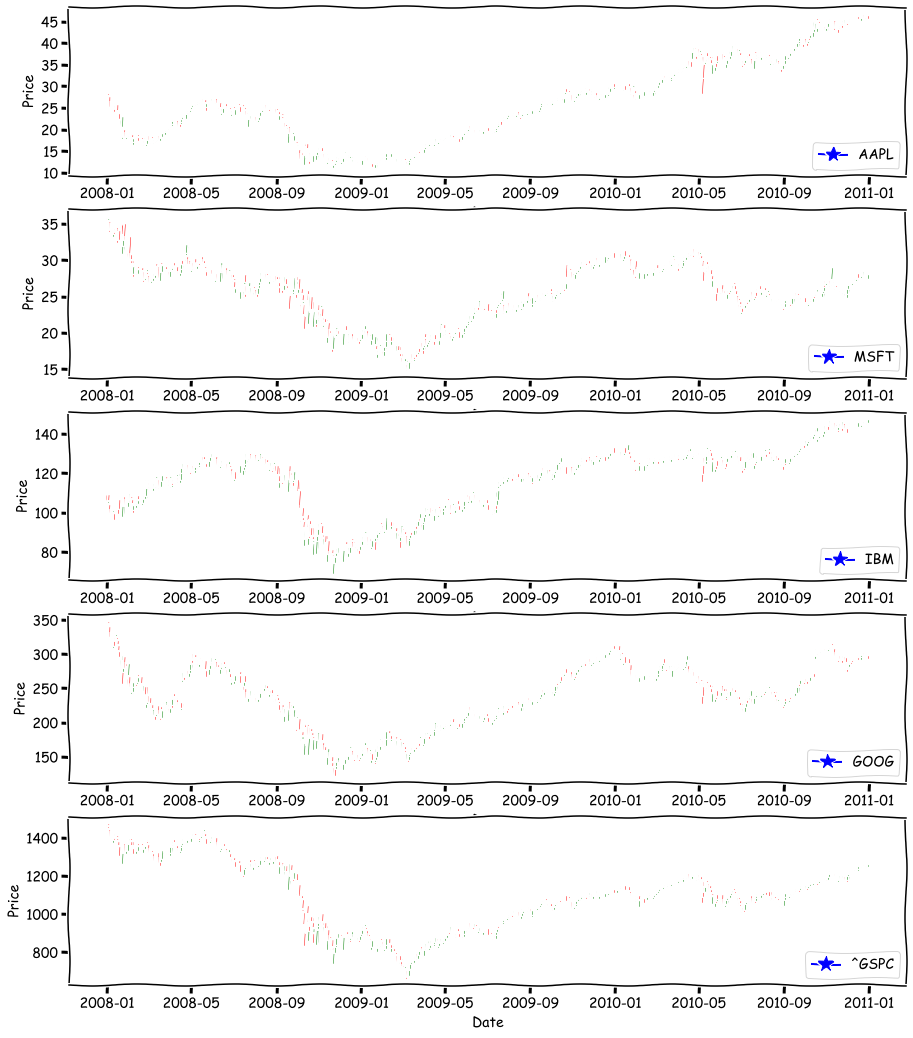

In [64]:
# If you are interested about making our own comical info-graphics, you can specify your own 
# xkcd-style plot by wrapping your plotting code with the with plt.xkcd() statement
with plt.xkcd():
    # So we'll just copy across all of our plotting information and pass through the xkcd formatting filter 
    fig = plt.gcf()
    fig.set_size_inches(15, 18)

    for i in range(len(company_list)):
        stock_group = stock_data.groupby('Ticker').get_group(company_list[i])
        ax = fig.add_subplot(5, 1, i+1)
        columns = ['Date', 'Open', 'High', 'Low', 'Close']
        candlestick_ohlc(ax,
                          stock_group[columns].values,
                          width = 0.7,
                          colorup = 'g')
        ax.xaxis_date()
        blue_star = mlines.Line2D([], [], color = 'blue', marker = '*',
                                   markersize = 15, label = company_list[i])
        plt.legend(handles = [blue_star], loc='lower right')
        plt.xlabel("Date")
        plt.ylabel("Price")

In this lecture I introduced you to visualize time-series data using candlestick plots, which has a number of important use cases for recognizing trade patterns. We particularly went through some useful matplotlib tricks such as mdates and mlines. You don't have to use all these for your assignments. I actually applied quite a bit myself out of the curiosity of understanding precipitation and solar level in my hometown Macau. So it's useful to take time practicing how to create stylish graphs, annotations in graphical visualizations since it's a pretty powerful way to interact with data and to interact with others as data scientists.

In [ ]:
# recession begins
# recession ends

In [25]:
apple_sample

,Date,Ticker,High,Low,Open,Close,Volume,Adj Close
0,733779.0,AAPL,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
1,733780.0,AAPL,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


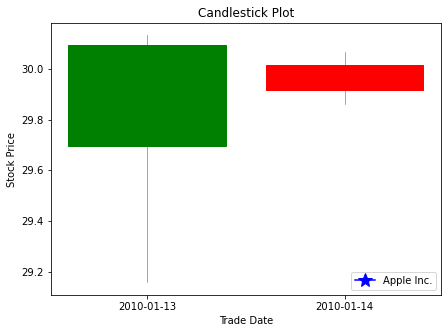

In [58]:
df = pd.read_csv('assets/stocks.csv', parse_dates = ['Date'], index_col = 1)
apple_sample = df['2010-01-13': '2010-01-14']
apple_sample = apple_sample[apple_sample.Ticker=='AAPL']
apple_sample.reset_index(inplace = True)
apple_sample['Date'] = apple_sample['Date'].map(mdates.date2num)

fig2 = plt.gcf()
fig2.set_size_inches(7,5)
ax2 = fig2.add_subplot()
columns = ['Date', 'Open', 'High', 'Low', 'Close']

candlestick_ohlc(ax2,
                  apple_sample[columns].values,
                  width = 0.8,
                  colorup = 'g')
ax2.xaxis_date()
ax2.xaxis.set_major_locator(mdates.DayLocator())
blue_star = mlines.Line2D([], [], color = 'blue', marker = '*',
                               markersize = 15, label = 'Apple Inc.')
    # and make the blue star as handles and set the legend at the lower right corner
plt.legend(handles = [blue_star], loc='lower right')
# plt.annotate('Open', xy = (733778.6, 30.26), xycoords = 'data',
#             arrowprops = dict(arrowstyle = '->, head_width = 0.5', 
#                               color = 'black', linewidth = 2))
plt.title("Candlestick Plot")
plt.xlabel("Trade Date")
plt.ylabel("Stock Price")
plt.savefig('Candlestick_Intro.png')

In [29]:
apple_sample
#mdates.date2num('2010-01-06')

,Date,Ticker,High,Low,Open,Close,Volume,Adj Close
0,2010-01-07,AAPL,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
1,2010-01-08,AAPL,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249
